## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [245]:
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [246]:
Xtest.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


In [247]:
Xtrain.shape[0], Xtest.shape[0]

(7500, 2500)

In [248]:
Xtrain.isna().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

In [249]:
mean_f2 = Xtrain['f2'].mean()
mean_f7 = Xtrain['f7'].mean()
mean_f11 = Xtrain['f11'].mean()
print(mean_f2, mean_f7, mean_f11)

Xtrain['f2'] = Xtrain['f2'].fillna(mean_f2)
Xtrain['f7'] = Xtrain['f7'].fillna(mean_f7)
Xtrain['f11'] = Xtrain['f11'].fillna(mean_f11)

238.90530767637296 0.24055573627737156 1068.693991989319


In [250]:
Xtrain.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [251]:
Xtest.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

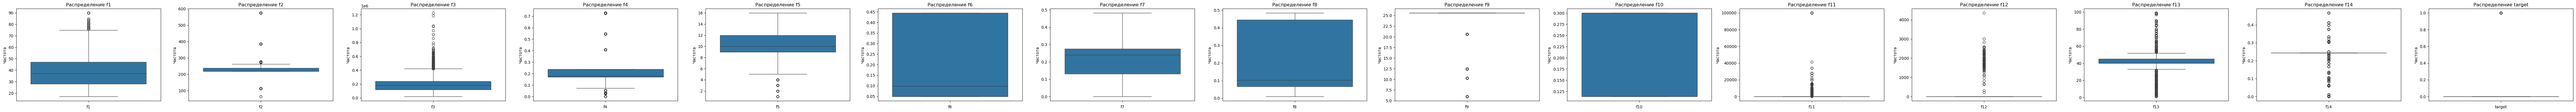

In [252]:
num_cols = Xtrain.columns 
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
   sns.boxplot(Xtrain[col], ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

- Нет, тк, выборака несбалансированная. И данная метрика не устойчива к таким данным.

In [253]:
Xtrain.target.value_counts()

target
0    5708
1    1792
Name: count, dtype: int64

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [286]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X1 = Xtrain.drop("target", axis=1)
y1 = Xtrain.target

X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(X1, y1, test_size=0.33, random_state=42)

X2 = Xtest.drop("target", axis=1)
y2 = Xtest.target

X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [274]:
knn = KNeighborsClassifier()
knn.fit(X_train_train, y_train_train)
y_pred_knn = knn.predict(X_test_train)
f1_knn = f1_score(y_test_train, y_pred_knn)

lr = LogisticRegression()
lr.fit(X_train_train, y_train_train)
y_pred_lr = lr.predict(X_test_train)
f1_lr = f1_score(y_test_train, y_pred_lr)

svc = SVC()
svc.fit(X_train_train, y_train_train)
y_pred_svc = svc.predict(X_test_train)
f1_svc = f1_score(y_test_train, y_pred_svc)

D:\Programs\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [276]:
print(f"f1_knn - {f1_knn}")
print(f"f1_lr - {f1_lr}")
print(f"f1_svc - {f1_svc}")

f1_knn - 0.31791221826809013
f1_lr - 0.37515842839036756
f1_svc - 0.08253968253968254


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [257]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [278]:
scaler = StandardScaler()
X_train_train[X_train_train.columns] = scaler.fit_transform(X_train_train[X_train_train.columns])
X_test_train[X_test_train.columns] = scaler.fit_transform(X_test_train[X_test_train.columns])

In [280]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train_train, y_train_train)

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_train, y_train_train)

svc = SVC(random_state=42, probability=True)
grid_svc = GridSearchCV(svc, param_grid_svc, cv=3, scoring='f1', n_jobs=-1)
grid_svc.fit(X_train_train, y_train_train)

print(f"Лучшие параметры KNN: {grid_knn.best_params_}")
print(f"Лучший F1 на кросс-валидации: {grid_knn.best_score_:.4f}")

print(f"Лучшие параметры Logistic Regression: {grid_lr.best_params_}")
print(f"Лучший F1 на кросс-валидации: {grid_lr.best_score_:.4f}")

print(f"Лучшие параметры SVC: {grid_svc.best_params_}")
print(f"Лучший F1 на кросс-валидации: {grid_svc.best_score_:.4f}")

Лучшие параметры KNN: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Лучший F1 на кросс-валидации: 0.6251
Лучшие параметры Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Лучший F1 на кросс-валидации: 0.6349
Лучшие параметры SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Лучший F1 на кросс-валидации: 0.6197


In [281]:
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')
knn_best.fit(X_train_train, y_train_train)
y_pred_knn_b = knn_best.predict(X_test_train)
f1_knn_best = f1_score(y_test_train, y_pred_knn_b)

lr_best = LogisticRegression(C=5, penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lr_best.fit(X_train_train, y_train_train)
y_pred_lr_b = lr_best.predict(X_test_train)
f1_lr_best = f1_score(y_test_train, y_pred_lr_b)

svc_best = grid_svc.best_estimator_
y_pred_svc_b = svc_best.predict(X_test_train)
f1_svc_best = f1_score(y_test_train, y_pred_svc_b)

In [282]:
print(f"f1_knn - {round(f1_knn_best, 3)}")
print(f"f1_lr - {round(f1_lr_best, 3)}")
print(f"f1_svc - {round(f1_svc_best, 3)}")

f1_knn - 0.624
f1_lr - 0.621
f1_svc - 0.621


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [296]:
y_pred_knn_test = knn_best.predict(X_test_test)
f1_knn_best_test = f1_score(y_test_test, y_pred_knn_test)
f1_knn_best_test

0.3532934131736527

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [298]:
y_pred_proba1 = knn_best.predict_proba(X_test)[:, 1] 
y_pred_proba2 = lr_best.predict_proba(X_test)[:, 1]

In [306]:
import numpy as np

alpha_values = np.linspace(0, 1, 101) 
best_alpha = 0
best_f1 = 0
f1_scores = []

for alpha in alpha_values:
    blended_proba = alpha * y_pred_proba1 + (1 - alpha) * y_pred_proba2
    
    blended_pred = (blended_proba > 0.5).astype(int)
    
    f1 = f1_score(y_test, blended_pred)
    f1_scores.append(f1)
    
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha

print(f"Оптимальный alpha: {best_alpha:.3f}")
print(f"Лучший F1-score: {best_f1:.4f}")

Оптимальный alpha: 0.840
Лучший F1-score: 0.3804


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
    - 1. Комбинация предсказаний лучших моделей
    - 2. Подбор гиперпараметров с GridSearchCV
- Какого максимального качества удалось добиться на Test-данных?
    - 2. 0.624
- Какое при этом получилось качество на отложенной выборке?
    - 3. Лучший F1-score: 0.3804
- Ваша модель переобучилась, недообучилась или обучилась как надо?
    - 4. Неодообучилась 

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.